## **Overview**:
This notebook is part of assignment provided by **ZYCAS** and belong to 1st Problem.

## **Problem Statement**:
Analyse the given data having user reviews and other information of restaurants. Perform an **EDA** to find out useful insights to **improve overall restaurant experience in Bengaluru.** <br> **Also:**
- Every insight should be supported and proven by data visualizations
- Create a brief EDA report, which helps us understand the nature of given dataset for the given problem.

In [1]:
# importing important libraries and 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
%matplotlib inline

#### Let's first read the data provided in csv format having reviews and others details of restaurants in Bangalore

In [2]:
dt= pd.read_csv('RestoInfo.csv')

## **Understanding the Data**

In [3]:
# shape & columns

print("Shape of data:", dt.shape)
print("Columns:", dt.columns)

Shape of data: (2069, 15)
Columns: Index(['Unnamed: 0', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


#### Features:
- **Unnamed:** restaurant ID or identification number
- **name:** name of restaurants
- **online_order:** whether restaurant is accepting order placed online or not
- **book_table:** booking of table is avialable or not 
- **rate:** overall rating of restuarant out of five
- **votes:** total numver of votes/rating for the restaurants
- **location:** location of restaurants
- **rest_type:** type of restaurants like quick Bites, Casual dining etc
- **dish_liked:** dish liked at restaurant
- **cuisines:** different type of food served like indian, continental, chinese etc
- **approx_cost:** approximate cost of meal for two people
- **reviews_list:** list of tuples containing ratings and reviews by people 
- **menu_item:** dishes served at restaurant
- **listed_in(type):** Meal type like dine-out or delivery
- **listed_in(city):** which locality they belong to

#### Data type and nulls in Features

In [4]:
data_info=pd.DataFrame(dt.dtypes).T.rename(index={0:'Column Data Type'})
data_info=data_info.append(pd.DataFrame(dt.isnull().sum()).T.rename(index={0:'Nulls'}))
data_info=data_info.append(pd.DataFrame((dt.isnull().sum()/dt.shape[0]*100).round(1).astype(str) + '%').T.rename(index={0:'Nulls (%)'}))
data_info

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
Column Data Type,int64,object,object,object,object,int64,object,object,object,object,object,object,object,object,object
Nulls,0,0,0,0,299,0,0,17,1107,0,16,0,0,0,0
Nulls (%),0.0%,0.0%,0.0%,0.0%,14.5%,0.0%,0.0%,0.8%,53.5%,0.0%,0.8%,0.0%,0.0%,0.0%,0.0%


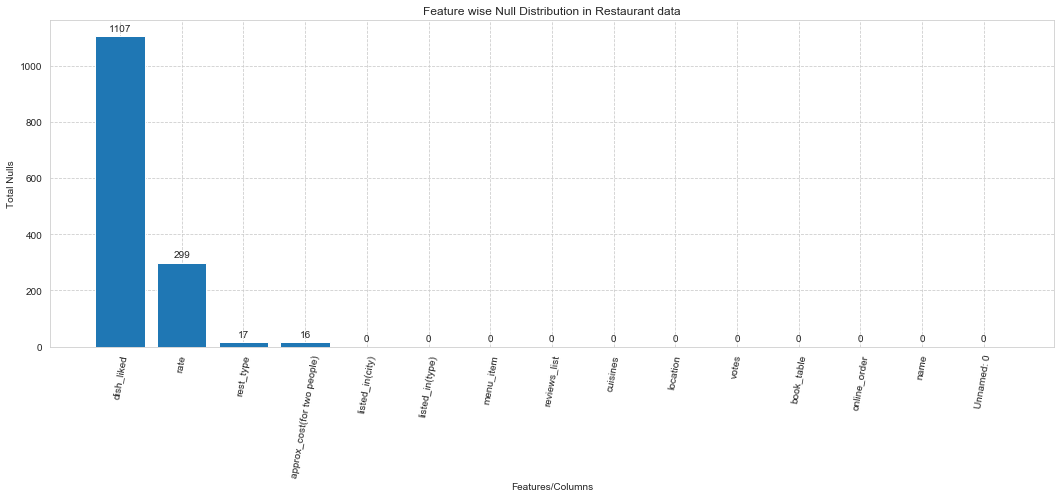

In [5]:
# Nulls

fig, ax= plt.subplots(figsize= (18,6))
temp= ax.bar(data_info.T['Nulls'].sort_values(ascending= False).index, data_info.T['Nulls'].sort_values(ascending= False))
plt.title('Feature wise Null Distribution in Restaurant data')
plt.ylabel('Total Nulls')
plt.xlabel('Features/Columns')
plt.xticks(rotation= 80)

for t in temp:
        height = t.get_height()
        ax.annotate('{}'.format(height),
                    xy=(t.get_x()+ t.get_width()/ 2, height),
                    xytext= (0, 3),  # 3 points vertical offset
                    textcoords= "offset points",
                    ha= 'center', va='bottom')


In [6]:
print("Head of data:")
dt.head()

Head of data:


,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


Checking if there is any duplicate rows in the data

In [7]:
print("Total duplicated rows:", dt.duplicated().sum())

Total duplicated rows: 0


#### Understanding data columns or features:

In [8]:
# checking 1st column
print("Distinct count of values in column one:", len(dt['Unnamed: 0'].unique()))

Distinct count of values in column one: 2069


This matches with total records our dats has, we can consider it as restaurant ID 

In [9]:
# looking at 2nd column: Name
print("Distinct restaurant names:", len(dt['name'].unique()))

Distinct restaurant names: 1665


Seems like our datset have multiple entries by same resuturant name. **Let's check their frequency** 

In [10]:
print("Frequency of restaurant names in our data sets:")
dt['name'].value_counts()

Frequency of restaurant names in our data sets:


Lassi Shop                           6
Apsara Ice Cream                     6
Hottey Smokey                        5
Ramji Chaiwale                       5
McDonald's                           5
                                    ..
Selfie Cafe                          1
Thanima Garden Restaurant            1
Take Us Away                         1
South Parade - The Chancery Hotel    1
The Cake House                       1
Name: name, Length: 1665, dtype: int64

let's select Lassi Shop and see all features to understands them better

In [11]:
dt[dt.name== 'Lassi Shop']

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
424,49579,Lassi Shop,No,No,3.2 /5,4,Sarjapur Road,"Dessert Parlor, Beverage Shop",NaN,"Beverages, Ice Cream",200,[],[],Desserts,Sarjapur Road
758,22272,Lassi Shop,Yes,No,NaN,0,JP Nagar,Dessert Parlor,NaN,"Ice Cream, Beverages",80,"[('Rated 1.0', ""RATEDn Very bad place. I usua...","['Dry Fruit Lassi', 'Fruit Salad with Ice Crea...",Delivery,JP Nagar
1155,35076,Lassi Shop,Yes,No,3.9 /5,39,JP Nagar,Beverage Shop,NaN,"Beverages, Ice Cream",200,"[('Rated 1.0', 'RATEDn goodnnice'), ('Rated 1...","['Belgian Chocolate Mocktail', 'Ferrero Rocher...",Delivery,Koramangala 7th Block
1682,40961,Lassi Shop,Yes,No,3.7 /5,14,Marathahalli,Beverage Shop,NaN,"Beverages, Ice Cream",200,"[('Rated 5.0', 'RATEDn Awesome place for refr...","['Dry Fruit Lassi', 'Falooda', 'Kesar Falooda'...",Delivery,Marathahalli
1760,20000,Lassi Shop,Yes,No,NaN,0,JP Nagar,Dessert Parlor,NaN,"Ice Cream, Beverages",80,"[('Rated 1.0', ""RATEDn Very bad place. I usua...","['Dry Fruit Lassi', 'Fruit Salad with Ice Crea...",Delivery,Jayanagar
1904,43116,Lassi Shop,Yes,No,3.7 /5,17,Brigade Road,Beverage Shop,NaN,"Beverages, Ice Cream",200,"[('Rated 5.0', ""RATEDn Seriously it's too che...","['Dry Fruit Lassi', 'Kulfi Falooda', 'Fruit Sa...",Desserts,MG Road


#### **Our Observations:**
- all six records have different IDs but same name
- they have different values in ratings, number of voetes, location, rest_type and other attributes which indicates they are five different restaurant

**Hottey Smokey restaurant**

In [12]:
dt[dt.name== 'Hottey Smokey']

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
28,7556,Hottey Smokey,Yes,No,NaN,0,"Varthur Main Road, Whitefield",Quick Bites,NaN,"American, Continental, Salad, Italian, Asian",400,"[('Rated 2.0', ""RATEDn Not good. Ordered food...","['Veg Fried Rice', 'Veg Nasi Goreng Rice', 'Ve...",Delivery,Brookefield
452,30851,Hottey Smokey,Yes,No,NaN,0,HSR,Quick Bites,NaN,"Asian, Salad, Italian",400,"[('Rated 1.0', 'RATEDn I have ordered through...",[],Delivery,Koramangala 5th Block
971,28112,Hottey Smokey,Yes,No,NaN,0,HSR,Quick Bites,NaN,"Asian, Salad, Italian",400,"[('Rated 1.0', 'RATEDn I have ordered through...",[],Delivery,Koramangala 4th Block
1038,41324,Hottey Smokey,Yes,No,NaN,0,"Varthur Main Road, Whitefield",Quick Bites,NaN,"Asian, Salad, Italian",400,"[('Rated 2.0', ""RATEDn Not good. Ordered food...","['Combo6', 'Veg Phad Thai Noodles', 'Veg Roast...",Delivery,Marathahalli
1435,33583,Hottey Smokey,Yes,No,NaN,0,HSR,Quick Bites,NaN,"Asian, Salad, Italian",400,"[('Rated 1.0', 'RATEDn I have ordered through...","['Combo5', 'Combo6', 'Prawns Phad Thai Noodles...",Delivery,Koramangala 6th Block


- Here it seems like these are only two restaurants but due to differance in listed_in(city) they have been duplicated.
- Here we are trying to indentify whether more than one records belong to same restaurant or all are different. By looking at above examples we can conclude that it's kind of mixture. Let's worry about these later...

## **Data Cleaning**

In [13]:
# changing column names

dt.rename(columns={'Unnamed: 0':'ID',
                  'approx_cost(for two people)':'cost_for2',
                  'listed_in(type)':'listed_in',
                  'listed_in(city)':'locality'}, inplace=True)
dt.columns

Index(['ID', 'name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for2', 'reviews_list',
       'menu_item', 'listed_in', 'locality'],
      dtype='object')

### **rate**

In [14]:
# refomatting rate column
print(dt['rate'].unique())
# dt['rate'].value_counts()

[nan '3.1 /5' '4.0/5' '4.2 /5' '3.9/5' '4.1 /5' '3.3/5' '4.4/5' '3.8/5'
 '3.1/5' '3.5/5' '3.8 /5' '2.9/5' '4.1/5' '3.7/5' '3.5 /5' '3.4 /5'
 '3.7 /5' '4.5/5' '4.3 /5' '3.6/5' '2.8 /5' '3.2/5' '4.0 /5' '2.9 /5'
 '3.0 /5' '4.4 /5' '3.2 /5' '4.6 /5' 'NEW' '3.9 /5' '3.0/5' '4.8 /5'
 '3.6 /5' '3.3 /5' '4.5 /5' '2.8/5' '3.4/5' '4.2/5' '2.1/5' '4.9 /5'
 '4.3/5' '2.7/5' '2.6/5' '2.7 /5' '2.2/5' '2.4/5' '2.5 /5' '2.1 /5'
 '1.8 /5' '2.6 /5' '4.7 /5' '-' '2.3/5' '4.6/5' '2.2 /5']


In [15]:
# removing /5
dt['rate']= dt['rate'].str.replace('/5', '')
dt['rate']= dt['rate'].str.replace(' ', '')

# replacing '-' as nan
dt.rate.replace(('-'),np.nan,inplace =True)

#replacing nan as 6 and 'NEW' as 0
dt.rate.fillna(6, inplace=True)
dt.rate.replace(('NEW'),0,inplace =True)

In [16]:
#Converting Rate Column datetype to float
dt.rate = dt.rate.astype('float')

### **online_order & book_table**

In [17]:
# converting online order & book_table into true flase asthey are in yes or no

dt.online_order.replace(('Yes','No'),(True,False),inplace =True)
dt.book_table.replace(('Yes','No'),(True,False),inplace =True)

### **cost_for2**

In [18]:
# converting cost_for2 into int
print(dt['cost_for2'].unique())
dt['cost_for2']= dt['cost_for2'].str.replace(',', '')

['200' '230' nan '800' '1,200' '250' '1,000' '450' '350' '300' '500' '400'
 '1,500' '150' '600' '900' '100' '1,300' '700' '1,600' '2,200' '1,800'
 '750' '650' '2,100' '1,700' '50' '3,000' '550' '950' '2,000' '1,400'
 '1,100' '2,500' '2,400' '1,350' '1,900' '180' '4,000' '850' '3,400'
 '2,800' '80' '120' '1,050' '1,250' '3,500']


In [19]:
dt.cost_for2.fillna(0, inplace=True)     # nan to 0
dt.cost_for2 = dt.cost_for2.astype('int')

#### **rest_type**

In [20]:
# Nan in rest_type
dt.rest_type.fillna('unknown', inplace=True)
print(dt['rest_type'].isnull().sum())

# rest_type: splitting them in multiple columns
rest_type = dt['rest_type'].apply(lambda x: pd.Series(x.split(','))) # splitting the column 'rest_type' into multiple columns
rest_type.columns=['rest_type_1','rest_type_2']# renaming the columns
rest_type.head(3)

0


,rest_type_1,rest_type_2
0,Quick Bites,NaN
1,Quick Bites,NaN
2,Dessert Parlor,NaN


In [21]:
rest_type.rest_type_1.unique()

array(['Quick Bites', 'Dessert Parlor', 'Casual Dining', 'Cafe', 'Bakery',
       'Beverage Shop', 'Pub', 'Takeaway', 'Delivery', 'Lounge',
       'Fine Dining', 'Bar', 'Mess', 'Kiosk', 'Food Court', 'unknown',
       'Microbrewery', 'Sweet Shop', 'Dhaba', 'Club', 'Food Truck',
       'Confectionery'], dtype=object)

#### **dish_liked**

In [22]:
# NAN
dt.dish_liked.fillna('unknown', inplace=True)
print(dt['dish_liked'].isnull().sum())

# dish_liked: splitting them in multiple columns
dish_liked = dt['dish_liked'].apply(lambda x: pd.Series(x.split(','))) # splitting the column into multiple columns
dish_liked.columns = ['dish_liked_1','dish_liked_2','dish_liked_3','dish_liked_4','dish_liked_5','dish_liked_6','dish_liked_7']# renaming the columns
dish_liked.head(3)

0


,dish_liked_1,dish_liked_2,dish_liked_3,dish_liked_4,dish_liked_5,dish_liked_6,dish_liked_7
0,unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,Icecream Cake,Brownie,Waffles,Chocolate Icecreams,Thick Shakes,NaN,NaN


In [23]:
dish_liked.dish_liked_1.value_counts()

unknown               1107
Burgers                 44
Cocktails               40
Coffee                  35
Paratha                 35
                      ... 
Raita                    1
Chicken Bruschetta       1
Veg Burger               1
Chocolate Cookies        1
Virgin Colada            1
Name: dish_liked_1, Length: 288, dtype: int64

#### **cuisines**

In [24]:
# # NAN
print(dt['cuisines'].isnull().sum())
# cuisines: splitting them in multiple columns
cuisines = dt['cuisines'].apply(lambda x: pd.Series(x.split(','))) # splitting the column into multiple columns
cuisines.columns = ['cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7','cuisines_8']# renaming the columns
cuisines.head(3)

0


,cuisines_1,cuisines_2,cuisines_3,cuisines_4,cuisines_5,cuisines_6,cuisines_7,cuisines_8
0,Fast Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Indian,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN
2,Ice Cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **FINAL Data:**
- will be using rest_type1, dish_liked1, cusines_1 in our dataset
    - we can treat rest of the columns of rest_type, dish_liked and cusinies columns and use them but that will increase the complexcity as well as requires more time
- will not use review_list, to exctract this feature, NLP can be used
- menu_item is not used as it is blank for 90% of data and remaining have very high dimentions
- remove rows having ratings as Null or New

In [25]:
df= pd.concat([dt[['ID', 'name', 'online_order', 'book_table', 'rate', 'votes', 'location', 'cost_for2', 'listed_in', 'locality']],
           rest_type['rest_type_1'],
           dish_liked['dish_liked_1'],
           cuisines['cuisines_1'],
          ], axis=1)
df= df[(df.rate!=6)&(df.rate!=0)]
df.head(10)

,ID,name,online_order,book_table,rate,votes,location,cost_for2,listed_in,locality,rest_type_1,dish_liked_1,cuisines_1
1,28849,Jayanthi Sagar,False,False,3.1,21,Koramangala 5th Block,200,Dine-out,Koramangala 4th Block,Quick Bites,unknown,South Indian
2,19855,Rock Stone Ice Cream Factory,True,False,4.0,131,BTM,230,Delivery,Jayanagar,Dessert Parlor,Icecream Cake,Ice Cream
3,35188,Punjabi by Nature 2.0,False,False,4.2,3236,BTM,0,Delivery,Koramangala 7th Block,Casual Dining,Paneer Tikki,North Indian
4,7070,Rayalaseema Chefs,True,True,3.9,225,Marathahalli,800,Delivery,Brookefield,Casual Dining,Bamboo Chicken,North Indian
5,32050,Bistro Oui,True,True,4.1,402,Koramangala 5th Block,1200,Pubs and bars,Koramangala 5th Block,Cafe,Veg Burger,Cafe
6,9918,Bhavani Upahara,True,False,3.3,9,Bannerghatta Road,250,Delivery,BTM,Quick Bites,unknown,South Indian
7,6134,Hotel Tom's Restaurant,True,True,4.4,712,Richmond Road,1000,Dine-out,Brigade Road,Casual Dining,Appam,Mangalorean
8,5350,Munchies,True,False,3.9,64,Brigade Road,250,Delivery,Brigade Road,Quick Bites,Burgers,Fast Food
9,2301,Vinaya Coffee Moments,True,False,3.8,46,JP Nagar,450,Dine-out,Bannerghatta Road,Cafe,Filter Coffee,Burger
10,6931,Kaati Zone,True,False,3.3,184,Marathahalli,350,Delivery,Brookefield,Quick Bites,Rolls,Fast Food


In [26]:
# column's data type and nulls

data_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Column Data Type'})
data_info=data_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Nulls'}))
data_info=data_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0]*100).round(1).astype(str) + '%').T.rename(index={0:'Nulls (%)'}))
data_info

,ID,name,online_order,book_table,rate,votes,location,cost_for2,listed_in,locality,rest_type_1,dish_liked_1,cuisines_1
Column Data Type,int64,object,bool,bool,float64,int64,object,int32,object,object,object,object,object
Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0
Nulls (%),0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


## **EDA**
**Insights for improving the overall restaurant experience in Bengaluru!**


#### **Votes Vs Ratings**

Text(0, 0.5, 'Total Votes')

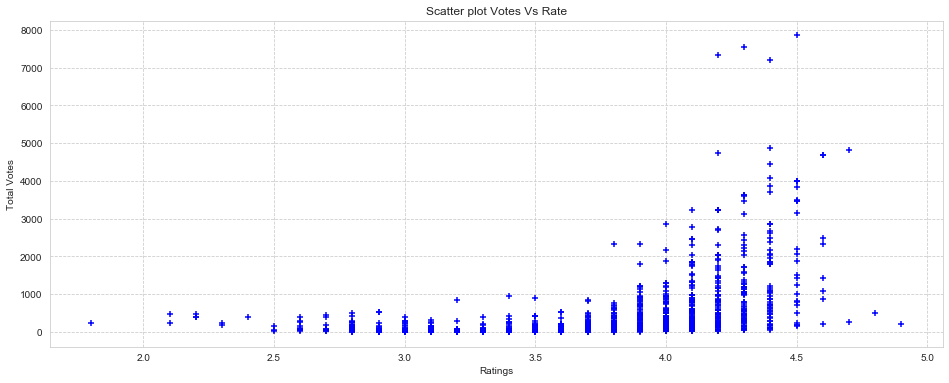

In [27]:
# let craete jointplot of rate & votes and see how they relates

plt.figure(figsize=(16,6))
plt.scatter(df.rate, df.votes, c='b', marker='+', cmap = "viridis")
plt.title('Scatter plot Votes Vs Rate')
plt.xlabel('Ratings')
plt.ylabel('Total Votes')

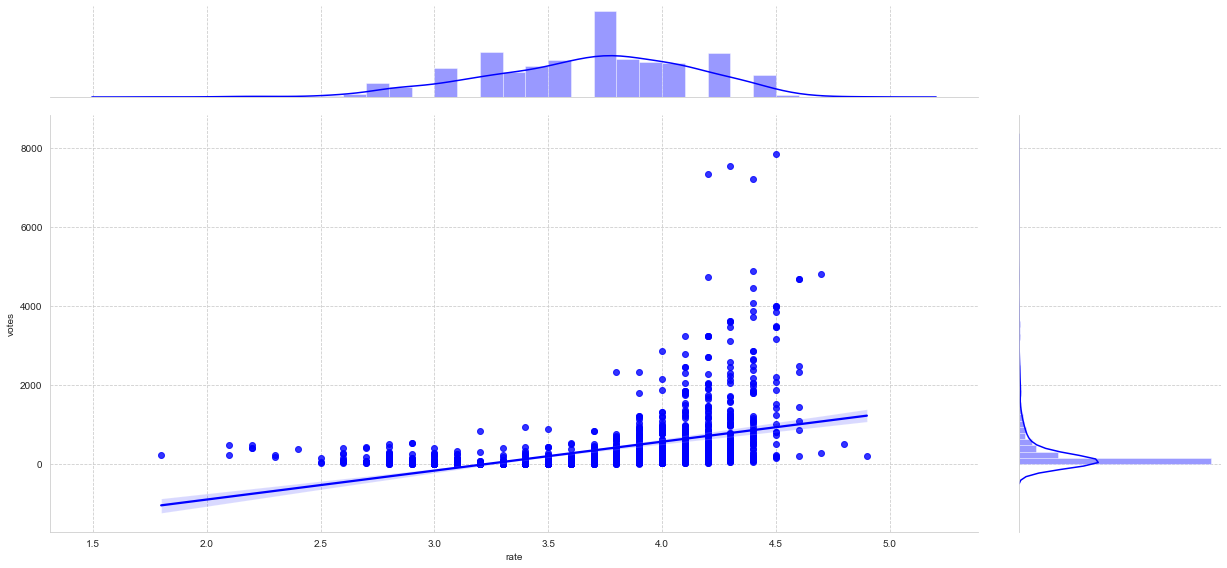

In [28]:
# sns.set(font_scale=1.2) # changing font size
g= sns.jointplot(x = df.rate, y = df.votes,  height=8, kind="reg", ratio=4, color="b")
g.fig.set_figwidth(18)
g.fig.set_figheight(8)

- From the plots, we can infer that:
    - most of the restaurants have ratings between 3 to 4.5 
    - as number of votes increases, resturant count decreases i.e. only few resturants have high number of votes/reviews
    - restaurant with high ratings gets more votes.

#### **Ratings Vs Avg Cost for two**

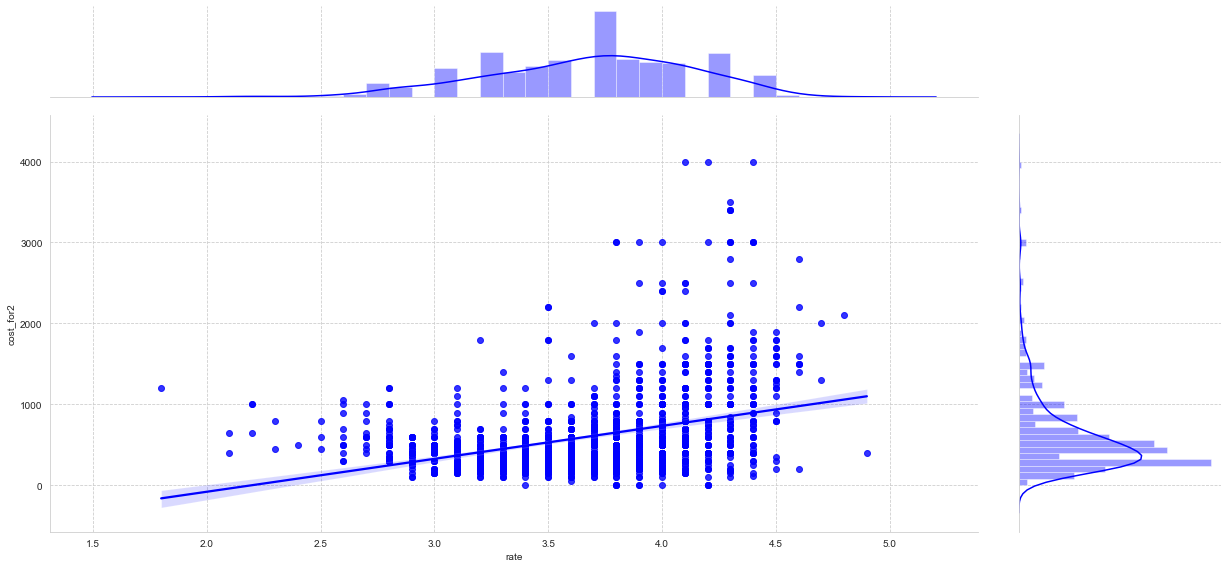

In [29]:
# sns.set(font_scale=1.2) # changing font size
g= sns.jointplot(x = df.rate, y = df.cost_for2,  height=8, kind="reg", ratio=4, color="b")
g.fig.set_figwidth(18)
g.fig.set_figheight(8)

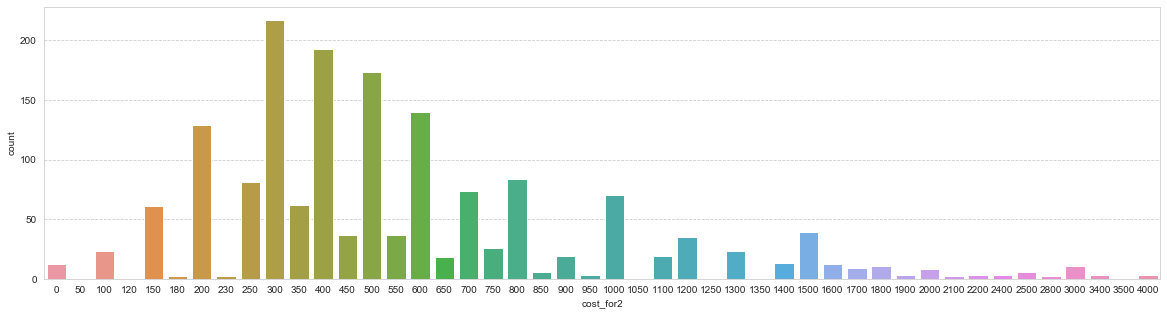

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(x=df.cost_for2)

- Heigher Cost realtes heigher ratings
- avg cost for two mostly ranges from 200 to 1000 

#### **online order**

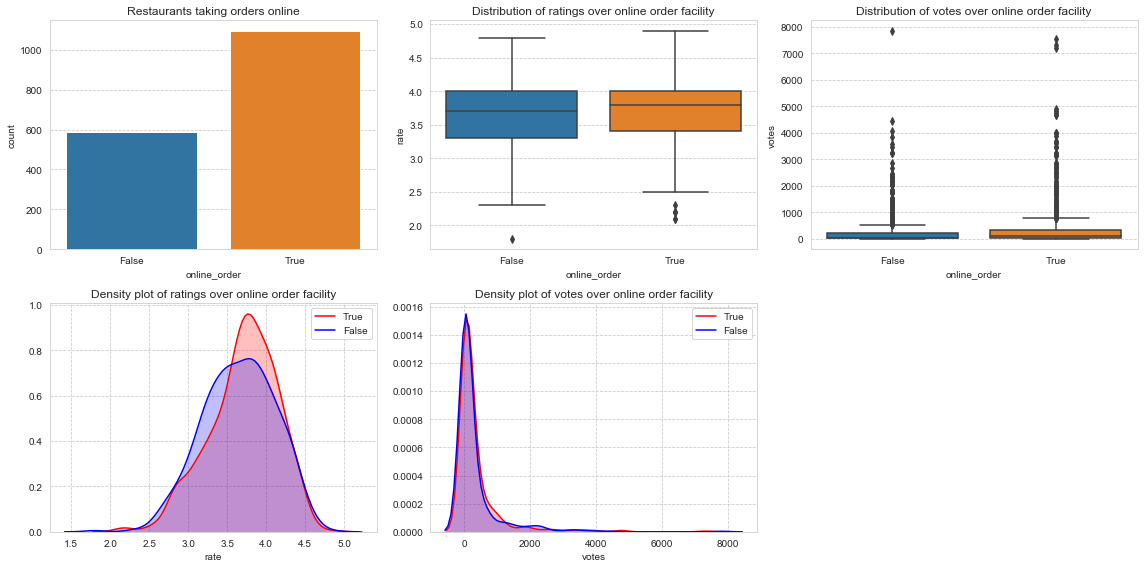

In [31]:
plt.figure(figsize= (16, 8))

plt.subplot(2, 3, 1)
sns.countplot(df.online_order)
plt.title("Restaurants taking orders online")

plt.subplot(2, 3, 2)
sns.boxplot(data= df, x= 'online_order', y= 'rate')
plt.title("Distribution of ratings over online order facility")

plt.subplot(2, 3, 3)
sns.boxplot(data= df, x= 'online_order', y= 'votes')
plt.title("Distribution of votes over online order facility")

plt.subplot(2, 3, 4)
sns.distplot(df[df['online_order']==True].rate,hist=False, color="r", kde_kws={"shade": True}, kde=True, label='True')
sns.distplot(df[df['online_order']==False].rate,hist=False, color="b", kde_kws={"shade": True}, kde=True, label='False')
plt.title("Density plot of ratings over online order facility")

plt.subplot(2, 3, 5)
sns.distplot(df[df['online_order']==True].votes,hist=False, color="r", kde_kws={"shade": True}, kde=True, label='True')
sns.distplot(df[df['online_order']==False].votes,hist=False, color="b", kde_kws={"shade": True}, kde=True, label='False')
plt.title("Density plot of votes over online order facility")

plt.tight_layout()

- Ratings and Votes have same distribution irespective of whether they provide online ordering facility or not

**checking if online order differs at different locatons and have different restaurants ratings**

Text(0.5, 1.0, 'Restaurants counts Vs top 10 locations across Online order')

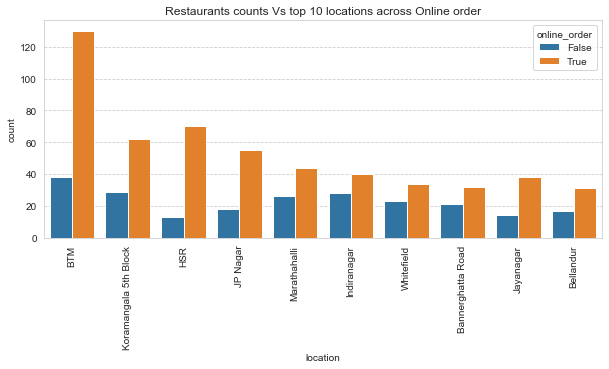

In [32]:
plt.figure(figsize= (10,4))

sns.countplot(hue= "online_order", x= "location", data= df, order= df['location'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title("Restaurants counts Vs top 10 locations across Online order")

Text(0.5, 1.0, 'Distribution of ratings for top 10 locations over restaurants having online order facility')

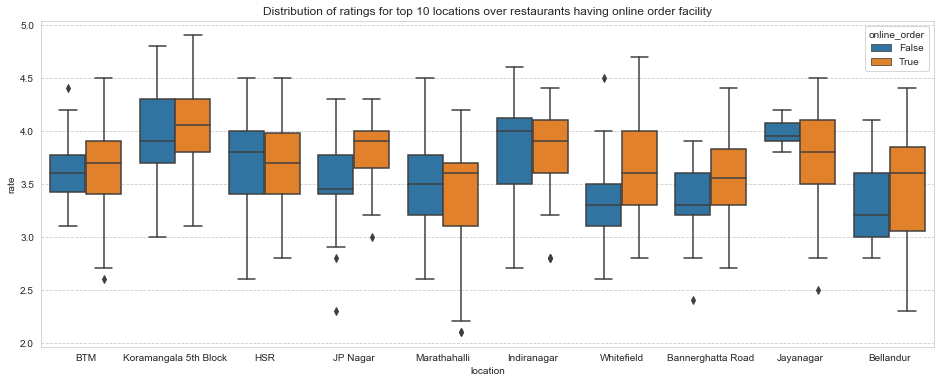

In [33]:
plt.figure(figsize= (16,6))
sns.boxplot(x= "location", y= "rate", hue= "online_order", data= df, order = df['location'].value_counts().head(10).index)
plt.title('Distribution of ratings for top 10 locations over restaurants having online order facility')

- Looks similar, just JP Nagar and whitefields have lttle heigher ratings for restaurants with online delievry facility

- Similarly checked if online order differs at different **listed localities** and have different restaurants ratings
    - restaurants ratings are similar irrespective of online order facilty across listed localities

**Looking at online order facility for resturant listed in type**

Text(0.5, 1.0, 'Restaurants counts Vs listed in type across Online order')

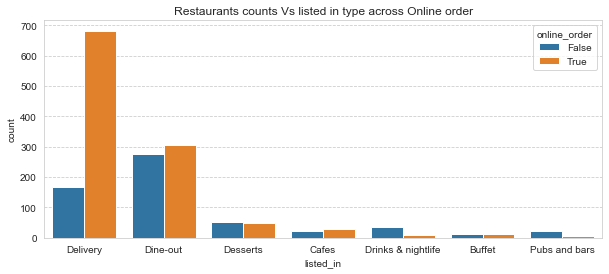

In [34]:
plt.figure(figsize= (10,4))

sns.countplot(hue= "online_order", x= "listed_in", data= df, order= df['listed_in'].value_counts().index)
# plt.xticks(rotation= 90)
plt.title("Restaurants counts Vs listed in type across Online order")

Text(0.5, 1.0, 'Distribution of ratings for listed in types over restaurants having online order facility')

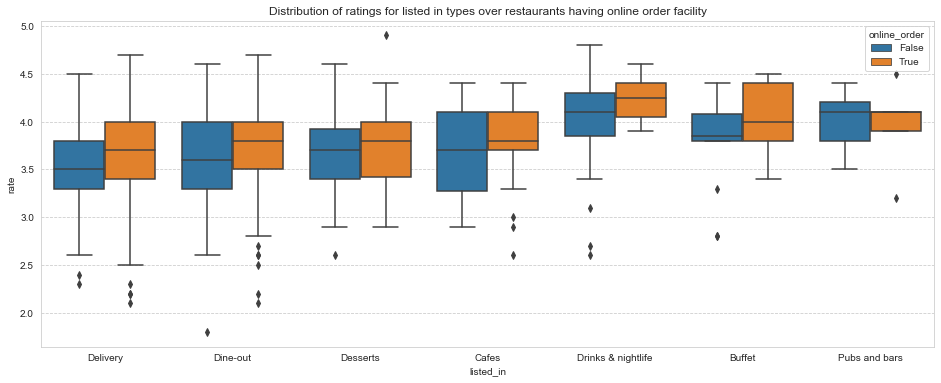

In [35]:
plt.figure(figsize= (16,6))
sns.boxplot(x= "listed_in", y= "rate", hue= "online_order", data= df, order = df['listed_in'].value_counts().index)
plt.title('Distribution of ratings for listed in types over restaurants having online order facility')

- Seems restaurants ratings are similar irrespective of online order facilty across different listed in types of restaurants
- Similarly checked for **restaurants types** but ratings are similar

- **Most liked dishes: Restaurants with/without online delivery**

Text(0.5, 1.0, 'Most liked Dish at Restaurants not having Online order facilty')

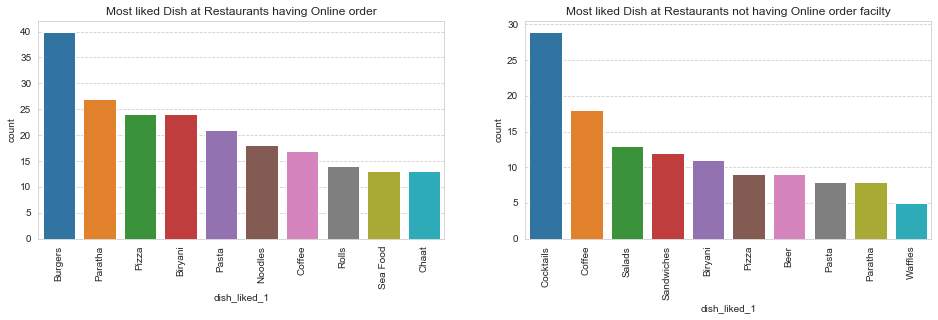

In [36]:
plt.figure(figsize= (16,4))

plt.subplot(1, 2, 1)
sns.countplot( x= "dish_liked_1", data= df[(df['dish_liked_1']!='unknown')&(df['online_order']==True)], 
              order= df[(df['dish_liked_1']!='unknown')&(df['online_order']==True)]['dish_liked_1'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title("Most liked Dish at Restaurants having Online order")

plt.subplot(1, 2, 2)
sns.countplot( x= "dish_liked_1", data= df[(df['dish_liked_1']!='unknown')&(df['online_order']==False)], 
              order= df[(df['dish_liked_1']!='unknown')&(df['online_order']==False)]['dish_liked_1'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title("Most liked Dish at Restaurants not having Online order facilty")

- **Most liked cuisines: Restaurants with/without online delivery**

Text(0.5, 1.0, 'Most liked cuisines at Restaurants not having Online order facilty')

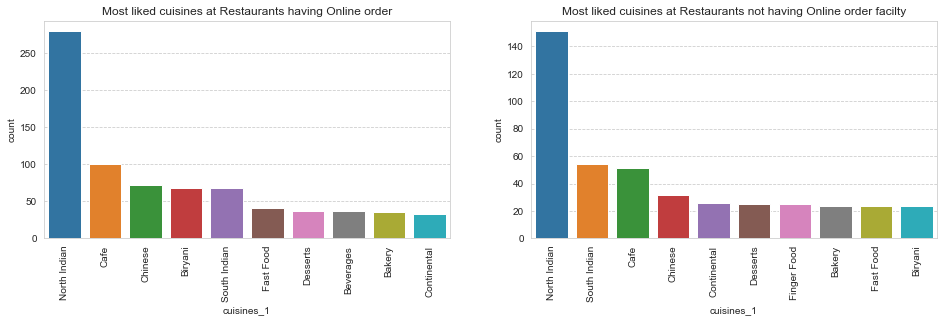

In [37]:
plt.figure(figsize= (16,4))

plt.subplot(1, 2, 1)
sns.countplot( x= "cuisines_1", data= df[df['online_order']==True], 
              order= df[df['online_order']==True]['cuisines_1'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title("Most liked cuisines at Restaurants having Online order")

plt.subplot(1, 2, 2)
sns.countplot( x= "cuisines_1", data= df[df['online_order']==False], 
              order= df[df['online_order']==False]['cuisines_1'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title("Most liked cuisines at Restaurants not having Online order facilty")

#### **Book Table**

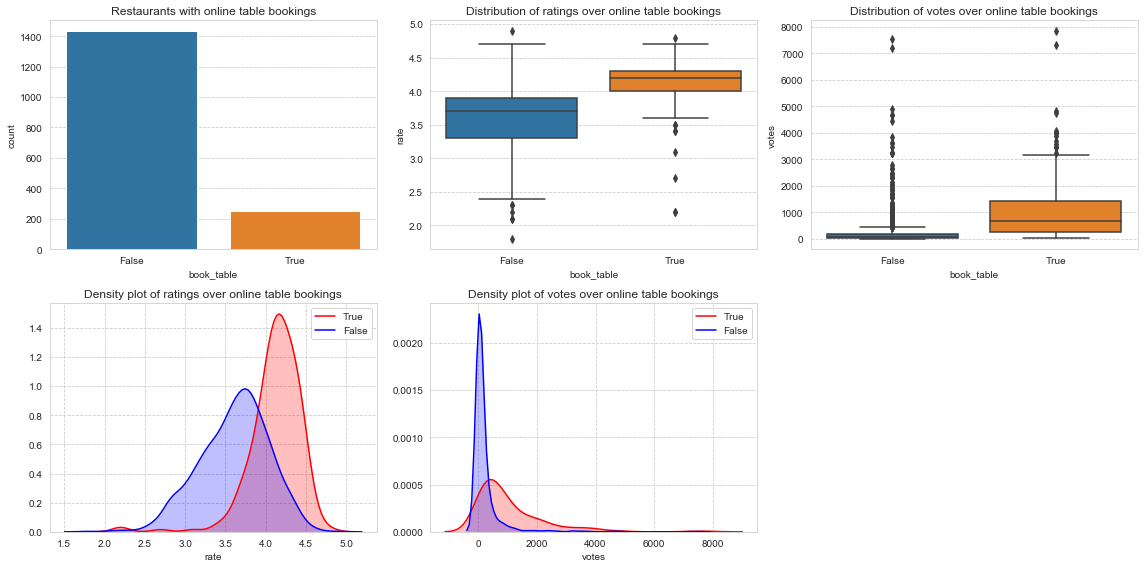

In [38]:
plt.figure(figsize= (16, 8))

plt.subplot(2, 3, 1)
sns.countplot(df.book_table)
plt.title("Restaurants with online table bookings")

plt.subplot(2, 3, 2)
sns.boxplot(data= df, x= 'book_table', y= 'rate')
plt.title("Distribution of ratings over online table bookings")

plt.subplot(2, 3, 3)
sns.boxplot(data= df, x= 'book_table', y= 'votes')
plt.title("Distribution of votes over online table bookings")

plt.subplot(2, 3, 4)
sns.distplot(df[df['book_table']==True].rate,hist=False, color="r", kde_kws={"shade": True}, kde=True, label='True')
sns.distplot(df[df['book_table']==False].rate,hist=False, color="b", kde_kws={"shade": True}, kde=True, label='False')
plt.title("Density plot of ratings over online table bookings")

plt.subplot(2, 3, 5)
sns.distplot(df[df['book_table']==True].votes,hist=False, color="r", kde_kws={"shade": True}, kde=True, label='True')
sns.distplot(df[df['book_table']==False].votes,hist=False, color="b", kde_kws={"shade": True}, kde=True, label='False')
plt.title("Density plot of votes over online table bookings")

plt.tight_layout()

- Restuarants having online table bookings have higher ratings as well as heigher votes

- **Does restaurants having online booking table facilty have heigher avg cost per two persons?**

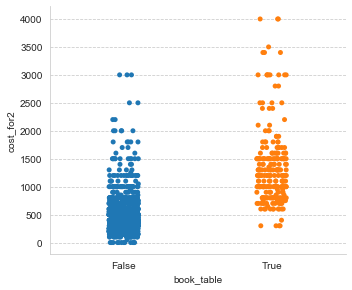

In [39]:
g= sns.catplot(x= "book_table", y= "cost_for2", data= df)
g.fig.set_figheight(4)

    - Yes,seems like that restaurants having online booking facilities have heigher average cost 

- **Locations having heighest/lowest numbers of restaurants having online table booking facilities**

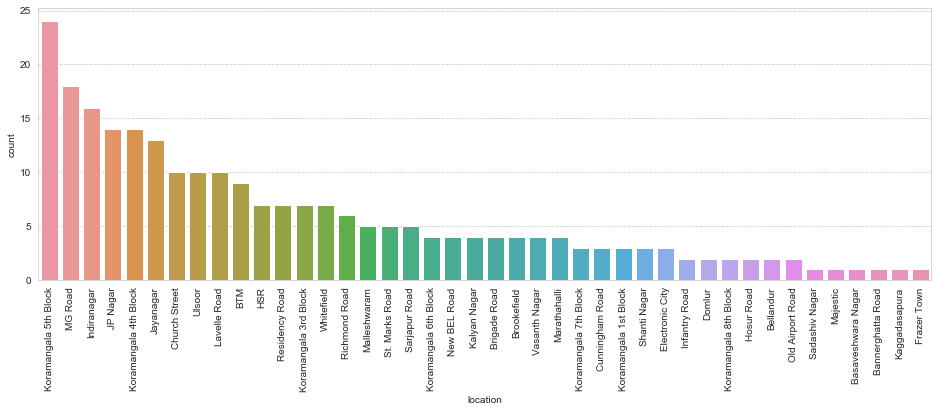

In [40]:
plt.figure(figsize=(16,5))
sns.countplot(data= df[df['book_table']==True], x= 'location', 
              order= df[df['book_table']==True]['location'].value_counts().index)
plt.xticks(rotation= 90)
plt.show()

#### **location**

In [41]:
df.location.value_counts()

BTM                      168
Koramangala 5th Block     91
HSR                       83
JP Nagar                  73
Marathahalli              70
                        ... 
Rammurthy Nagar            1
Langford Town              1
Koramangala                1
Nagarbhavi                 1
KR Puram                   1
Name: location, Length: 80, dtype: int64

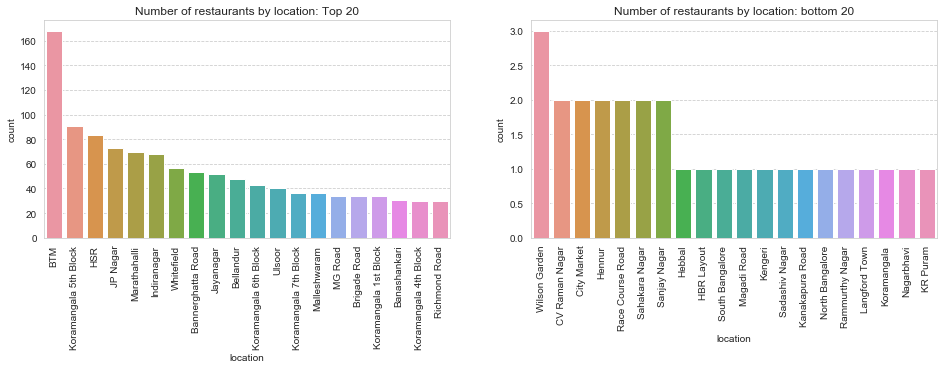

In [42]:
plt.figure(figsize= (16,4))

plt.subplot(1, 2, 1)
sns.countplot(data= df, x= 'location', order= df['location'].value_counts().head(20).index)
plt.xticks(rotation= 90)
plt.title('Number of restaurants by location: Top 20')

plt.subplot(1, 2, 2)
sns.countplot(data= df, x= 'location', order= df['location'].value_counts().tail(20).index)
plt.xticks(rotation= 90)
plt.title('Number of restaurants by location: bottom 20')
plt.show()

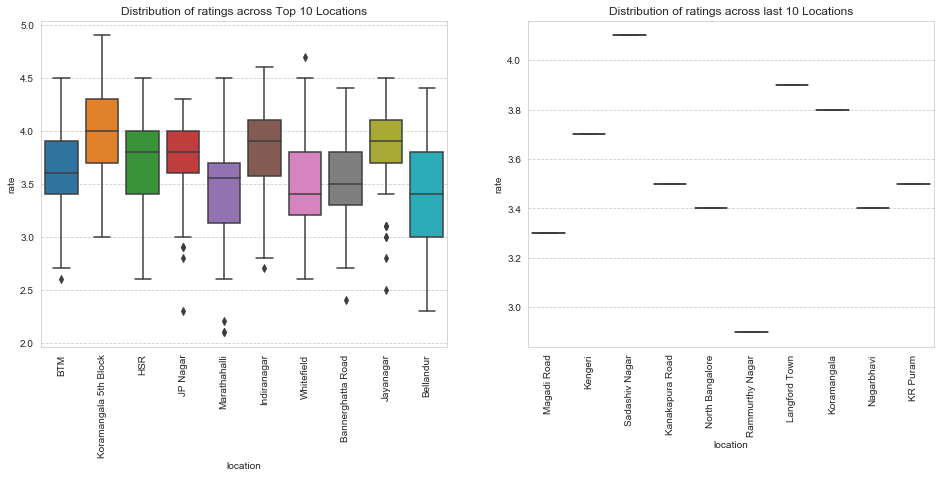

In [43]:
plt.figure(figsize= (16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data= df, x= 'location', y='rate', order= df['location'].value_counts().head(10).index)
plt.xticks(rotation= 90)
plt.title('Distribution of ratings across Top 10 Locations')

plt.subplot(1, 2, 2)
sns.boxplot(data= df, x= 'location', y='rate', order= df['location'].value_counts().tail(10).index)
plt.xticks(rotation= 90)
plt.title('Distribution of ratings across last 10 Locations')

plt.show()

- BTM has highest number of resturants
- Koramangala 5th Block has heighest ratings with median around 4

**Cuisines not available at the location (under top 10 locations) which are in top 10 cuisine list across locations:**

In [44]:
top_10=pd.DataFrame(df[df['cuisines_1'].isin(df['cuisines_1'].value_counts().head(10).index)].cuisines_1.drop_duplicates())
top_10['cuisines_1']

temp= df[df['location'].isin(df['location'].value_counts().head(10).index)][['location','cuisines_1']].drop_duplicates()
for loc in temp.location.unique():
    t= temp[temp['location']==loc]
    print('Top 10 cuisines not available at',loc,':')
    print(top_10[~top_10['cuisines_1'].isin(t.cuisines_1)]['cuisines_1'].unique())


Top 10 cuisines not available at Koramangala 5th Block :
[]
Top 10 cuisines not available at BTM :
[]
Top 10 cuisines not available at Marathahalli :
['Continental']
Top 10 cuisines not available at Bannerghatta Road :
['Desserts']
Top 10 cuisines not available at JP Nagar :
['Fast Food' 'Desserts']
Top 10 cuisines not available at Bellandur :
['Desserts']
Top 10 cuisines not available at Indiranagar :
['Beverages']
Top 10 cuisines not available at Whitefield :
['Continental']
Top 10 cuisines not available at Jayanagar :
['Continental' 'Bakery']
Top 10 cuisines not available at HSR :
['Fast Food']


#### **listed in (type)**

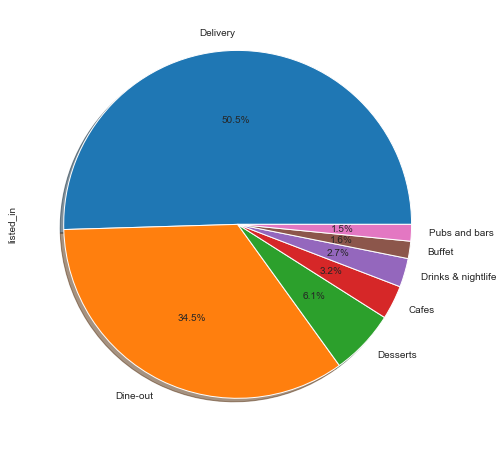

In [45]:
df.listed_in.value_counts().plot.pie(autopct='%.1f%%', shadow=True, figsize=(8,8))
plt.show()

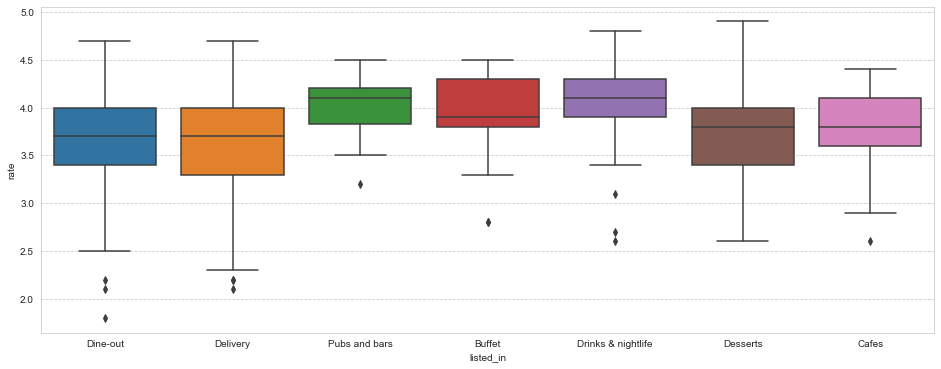

In [46]:
#ratings vs listed type

plt.figure(figsize= (16,6))
sns.boxplot(x= "listed_in", y= "rate", data= df)
plt.show()

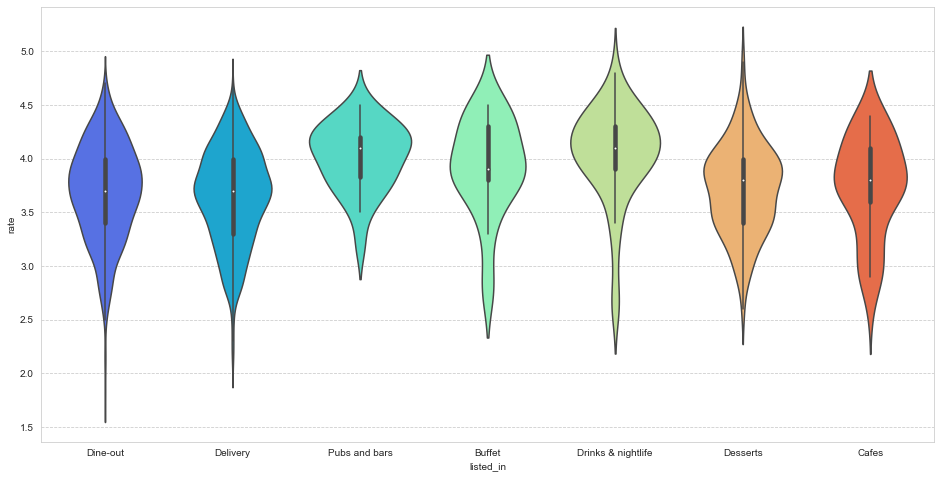

In [47]:
#lets plot swarmplot and violin plot together better understanding of rating vs listed-in type

plt.figure(figsize= (16,8))
sns.violinplot(x = "listed_in", y = "rate",data = df, palette= "rainbow")
plt.show()

- Majority of restaurants **(~>50%)** provides an option of home delivery and **35%** of the restaurants provides Dine out option
- The Restaurants which serve drinks (pubs and bars, Drinks & nightlife) has median rating more than 4 which is heigher than others


#### **Locality restaurant listed in**

In [48]:
len(df.locality.unique())

30

Text(0, 0.5, 'Count')

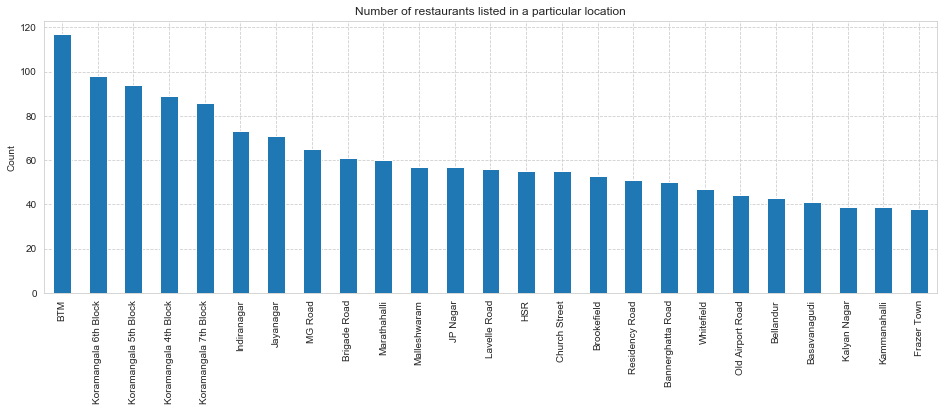

In [49]:
# Lets see to in which area most of the restaurants are listed in or deliver to

plt.figure(figsize=(16,5))
df.locality.value_counts().nlargest(25).plot(kind = "bar")
plt.title("Number of restaurants listed in a particular location")
plt.ylabel("Count")

- as expected most of the restaurants are listed_in (deliver to) BTM Layout because this area is home to most of restaurants.
- most of restaurants are in kormangala 5th block but kromangala region stands second in delivery

#### **rest_type**

In [50]:
print('unique rest_type_1:',len(df.rest_type_1.unique()))

unique rest_type_1: 21


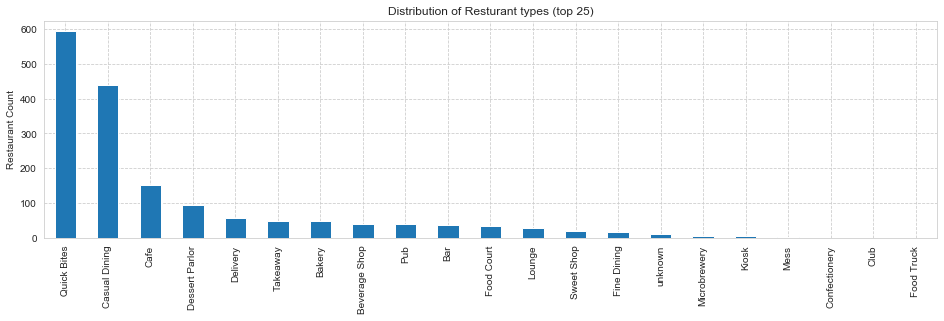

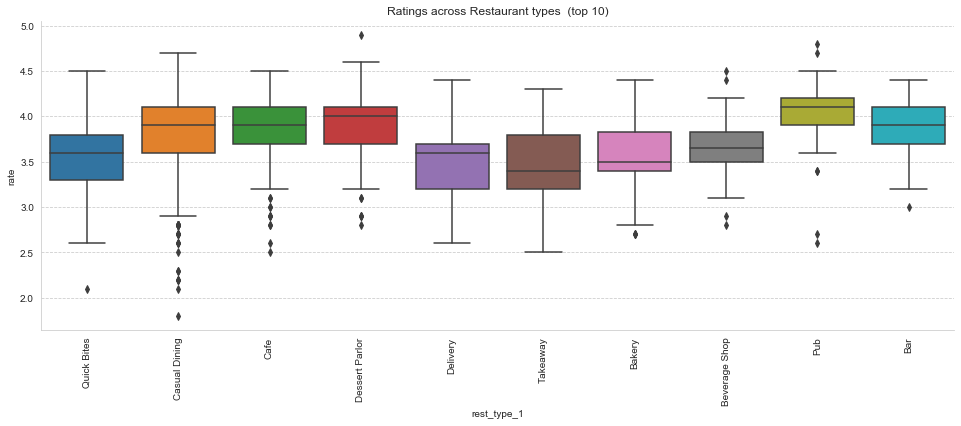

In [51]:
plt.figure(figsize=(16,4))
df.rest_type_1.value_counts().nlargest(25).plot(kind = "bar")
plt.title("Distribution of Resturant types (top 25)")
plt.ylabel("Restaurant Count")

b = sns.catplot(data = df, kind = 'box', x = 'rest_type_1', y= 'rate', order = df['rest_type_1'].value_counts().head(10).index)
plt.title('Ratings across Restaurant types  (top 10)')
b.set_xticklabels(rotation = 90)
b.fig.set_figwidth(15)

- Quick bites and casual dining are most common restaurant types with pubs most highly rated

#### **dish_liked**

In [52]:
print('unique dish_liked_1:',len(df.dish_liked_1.unique()))

unique dish_liked_1: 285


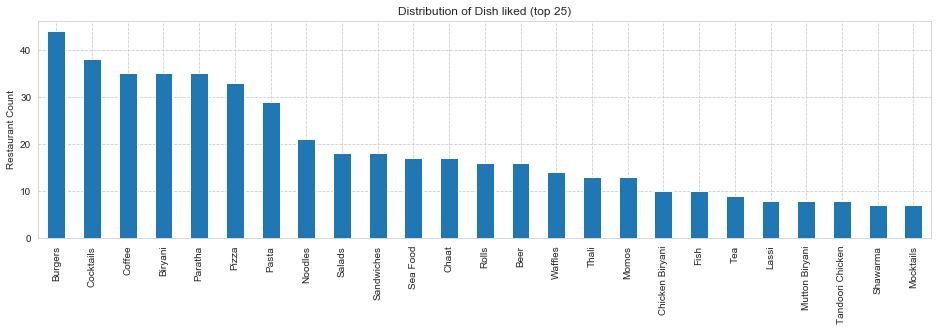

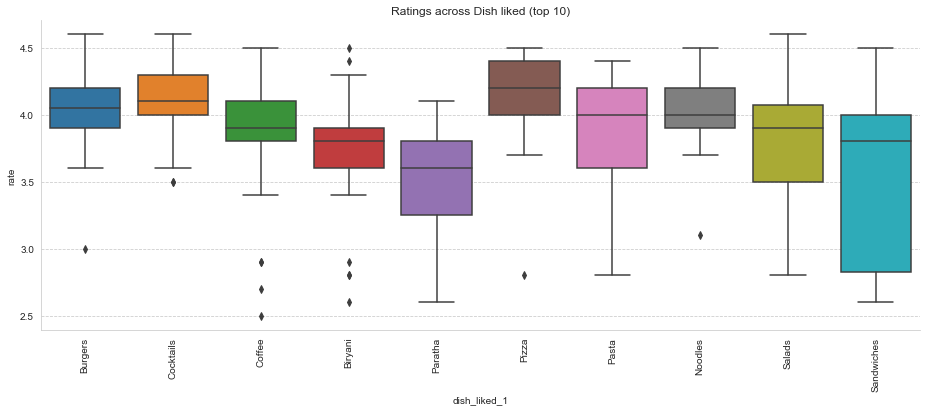

In [53]:
plt.figure(figsize=(16,4))
df[df['dish_liked_1']!='unknown'].dish_liked_1.value_counts().nlargest(25).plot(kind = "bar")
plt.title("Distribution of Dish liked (top 25)")
plt.ylabel("Restaurant Count")

b = sns.catplot(data = df[df['dish_liked_1']!='unknown'], kind = 'box', x = 'dish_liked_1', y= 'rate', 
                order = df[df['dish_liked_1']!='unknown']['dish_liked_1'].value_counts().head(10).index)
plt.title('Ratings across Dish liked (top 10)')
b.set_xticklabels(rotation = 90)
b.fig.set_figwidth(15)

- Burger is most commonly liked food

#### **cuisines**

In [54]:
print('unique cuisines_1:',len(df.cuisines_1.unique()))

unique cuisines_1: 66


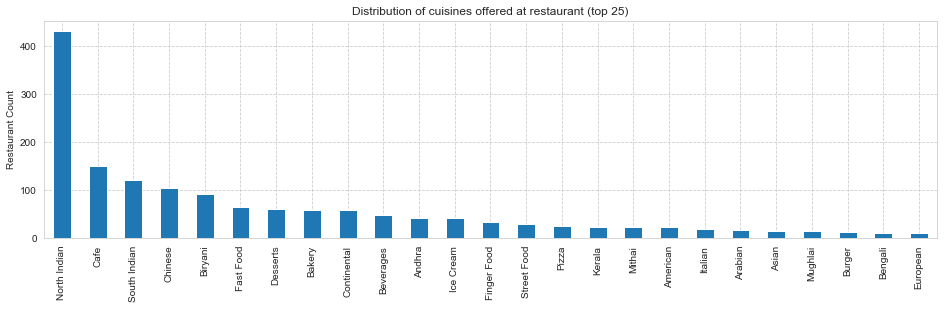

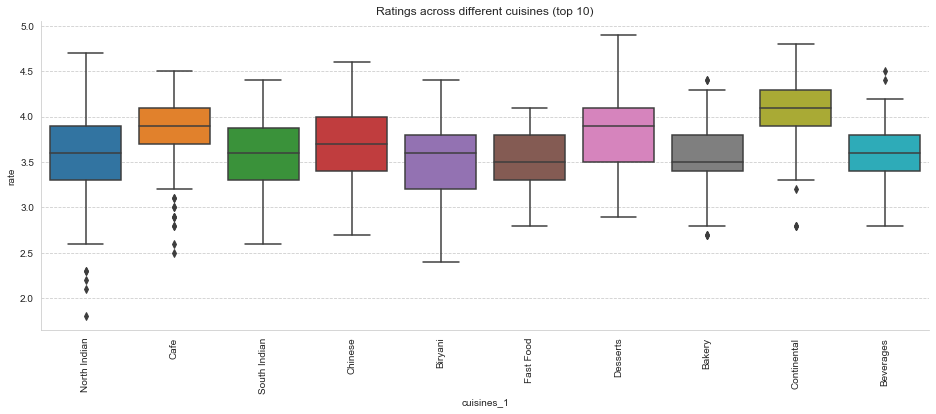

In [55]:
plt.figure(figsize=(16,4))
df.cuisines_1.value_counts().nlargest(25).plot(kind = "bar")
plt.title("Distribution of cuisines offered at restaurant (top 25)")
plt.ylabel("Restaurant Count")

b = sns.catplot(data = df, kind = 'box', x = 'cuisines_1', y= 'rate', order = df['cuisines_1'].value_counts().head(10).index)
plt.title('Ratings across different cuisines (top 10)')
b.set_xticklabels(rotation = 90)
b.fig.set_figwidth(15)

- north indian cuisines are served in most of restaurants but continental have highest median ratings

**Top 10 highest rated restaurant**

In [56]:
df[['name','rate']].sort_values(by= ['rate'], ascending= False).head(10)

,name,rate
229,Belgian Waffle Factory,4.9
96,Biergarten,4.8
1338,Hammered,4.7
1056,You Mee,4.7
594,Toast & Tonic,4.6
1270,The Terrace at Gilly's Redefined,4.6
1291,Yauatcha,4.6
1667,Koramangala Social,4.6
1093,Koramangala Social,4.6
1908,Smoke House Deli,4.6
